# Homework 09
This homework is based on the classification and regression lectures.

## Question 1
#### In the table below, fill in the definition column with a short (no more than two sentence) definition for each vocab word. If it can be summarized by a formula, give the formula.

| Vocab Word | Definition |
|:--------|:--------|
| **One-hot coding**| Convert categorical variables into a numerical format |
| **Feature selection*** | Choosing the most relevant features to use in a predictive model to enhance performance|
| **Classifier** | Machine learning algorithm that assigns data points to predefined classes |
| **Precision** |(TP/(TP + FP)) |
| **Recall** | (TP/(TP + FN)) |
| **F1 Score** | 2 x (precision x recall)/ (precision +recall)  |
| **Parsimonious model** | a model that uses the fewest parameters to explain a phenomenon accurately|
| **Ridge regression** | an extension of linear regression and takes regression coefficients toward zero, making them smaller |
| **LASSO regression** | applying an L1 penalty to the model's coefficients. This penalty can shrink some coefficients to zero,removing variables from the model, which helps to reduce overfitting and improve the interpretability of the model. |
| **Cross validation** | resampling technique used to evaluate machine learning models and assess how well they will generalize to an independent dataset |
| **Tree based methods** | machine learning algorithms and used widely used for both classification and regression tasks. |

*Just give the general idea.

## Question 2
#### a) What shape does a perfect classifier look like on an ROC curve? What about a bad classifier?

A perfect line would be a straight line on the left side and a horizontal line on the top of the graph.  A bad classifier would look like a diagonal line from the bottom-left corner to the top-right corner.

#### b) Think about the formula for an F1 score. What does it mean when the F1 score is close to 1? Close to 0?
It means that that model has high precision and high recall if the F1 score is close to 1. If it is close to 0 then the model is not good and has low performance.

## Question 3
#### Compare the following aspects of linear vs. logistic regression.
|  | Linear | Logistic |
|:--------|:--------|:--------|
| **Chart Shape** | straight line drawn through a scatter plot of data points | sigmoid curve |
| **Dependent Variable Type** | continuous | catagorical/binary |
| **Purpose** (regression or classification) | regression | classification |
| **Range of output variable** ($y_i$ or $p_i$) | $y_i$ | $p_i$ |
| **Method*** | least squares | Maximum likelihood estimation |
| **Example of use** | Predicting house prices | In a heathcare setting you can use logisitc regression to predict patient disease outcomes |  
  
*Meaning ordinary least squares or maximum likelihood estimation

## Question 4
#### Why is it important to train then test our model? How do we do that? (2-3 sentences. Not looking for code, just general explanation).

Training helps the machine learning algorythm to predict results especially in specific catagories to give more accurate preductions and results and see how our machine performs with unseen data. We can do this by choosing a suitable model architecture and training method and feed the chosen data to the model so it can learn.

## Question 5
This question runs through a linear regression example. We want to predict median house value based on the other variables.
#### a) First, load the `housing.csv` data set. Look at the data in some useful way. Why is linear regression appropriate here?

In [2]:
library(tidyverse)
df <- read.csv("housing.csv")

head(df)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value
,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<int>
1,-122.23,37.88,41,880,322,126,8.3252,452600
2,-122.22,37.86,21,7099,2401,1138,8.3014,358500
3,-122.24,37.85,52,1467,496,177,7.2574,352100
4,-122.25,37.85,52,1274,558,219,5.6431,341300
5,-122.25,37.85,52,1627,565,259,3.8462,342200
6,-122.25,37.85,52,919,413,193,4.0368,269700


For the dataset a linear regression is appropriate because the data presented in continuous and presents more numerical data.

#### b) Scale data and split it 75/25 training/testing. Set seed = 123.

In [11]:
library(tidyverse)
df <- read.csv("housing.csv")

names(df) <- names(df) %>%
  str_replace_all("-", "_") %>%
  str_replace_all("[^_A-Za-z0-9]*", "") %>%
  str_to_lower()

scale <- function(a) {
  (a - min(a)) / (max(a) - min(a))
}
df_num <- df %>%
  select(where(is.numeric)) %>%
  mutate(across(where(is.numeric), scale))

set.seed(123)
train <- runif(nrow(df_num)) < 0.75
test <- !train



#### c) Fit the model.

In [15]:
library(tidyverse)
df <- read.csv("housing.csv")

names(df) <- names(df) %>%
  str_replace_all("-", "_") %>%
  str_replace_all("[^_A-Za-z0-9]*", "") %>%
  str_to_lower()

scale <- function(a) {
  (a - min(a)) / (max(a) - min(a))
}
df_num <- df %>%
  select(where(is.numeric)) %>%
  mutate(across(where(is.numeric), scale))

set.seed(123)
train <- runif(nrow(df_num)) < 0.75
test <- !train

f <- median_income ~ longitude + latitude	+ housing_median_age + total_rooms + population	+ households + median_house_value
m <- lm(f, data = df_num %>% filter(train))
summary(m)






Call:
lm(formula = f, data = df_num %>% filter(train))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.56830 -0.04161 -0.00061  0.04167  0.84645 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.151781   0.009200  16.498   <2e-16 ***
longitude          -0.013445   0.010320  -1.303    0.193    
latitude           -0.014742   0.009249  -1.594    0.111    
housing_median_age -0.077978   0.002919 -26.710   <2e-16 ***
total_rooms         1.885250   0.033506  56.266   <2e-16 ***
population          0.676824   0.054368  12.449   <2e-16 ***
households         -1.991774   0.032994 -60.368   <2e-16 ***
median_house_value  0.364816   0.003457 105.522   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.08049 on 15556 degrees of freedom
Multiple R-squared:  0.6235,	Adjusted R-squared:  0.6233 
F-statistic:  3680 on 7 and 15556 DF,  p-value: < 2.2e-16


#### d) Make predictions on test data and show them in an actual vs. predicted plot.

Warning message in geom_segment(aes(x = 0, y = 0, xend = 1, yend = 1)):
“All aesthetics have length 1, but the data has 5076 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.”


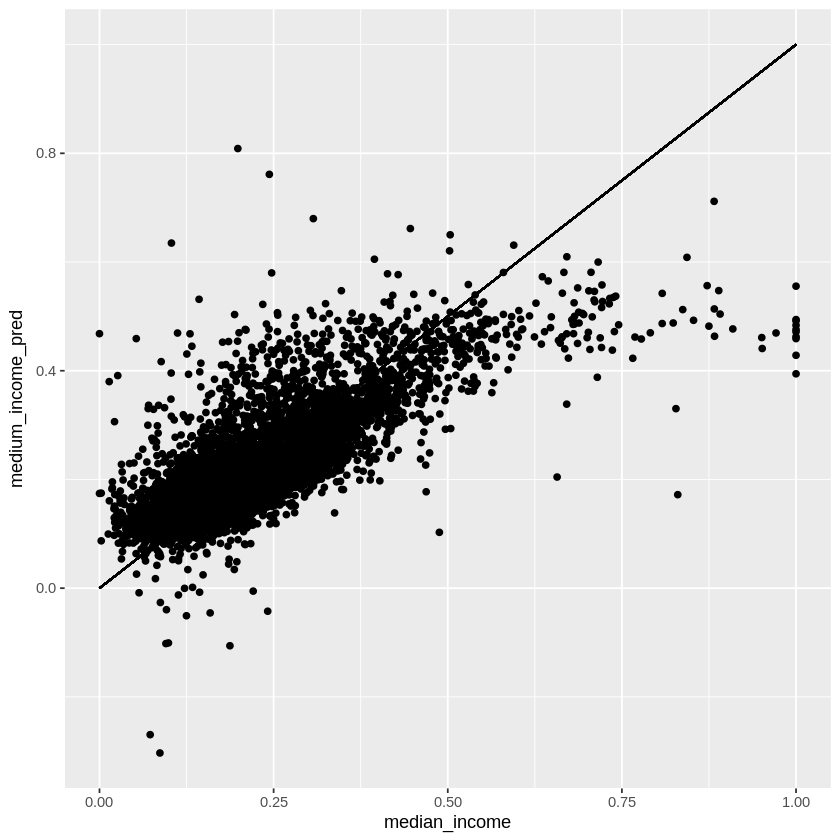

In [17]:
library(tidyverse)
df <- read.csv("housing.csv")

names(df) <- names(df) %>%
  str_replace_all("-", "_") %>%
  str_replace_all("[^_A-Za-z0-9]*", "") %>%
  str_to_lower()

scale <- function(a) {
  (a - min(a)) / (max(a) - min(a))
}
df_num <- df %>%
  select(where(is.numeric)) %>%
  mutate(across(where(is.numeric), scale))

set.seed(123)
train <- runif(nrow(df_num)) < 0.75
test <- !train

f <- median_income ~ longitude + latitude	+ housing_median_age + total_rooms + population	+ households + median_house_value
m <- lm(f, data = df_num %>% filter(train))

dx <- df_num %>% filter(test)
dx <- dx %>%
  mutate(medium_income_pred = predict(m, dx %>% as.data.frame()))

ggplot(dx, aes(median_income, medium_income_pred)) +
  geom_point() +
  geom_segment(aes(x = 0, y = 0, xend = 1, yend = 1))



#### e) Make a residuals plot.

Warning message in geom_segment(aes(x = 0, y = 0, xend = 1, yend = 1)):
“All aesthetics have length 1, but the data has 5076 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.”


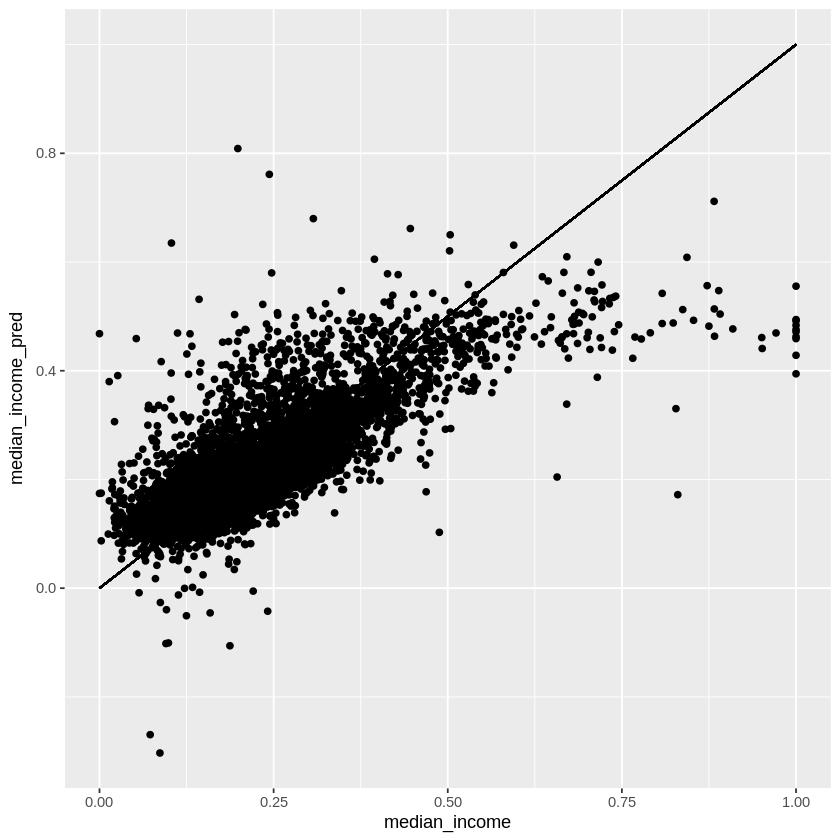


Call:
lm(formula = f, data = df_num %>% filter(train))

Coefficients:
       (Intercept)           longitude            latitude  housing_median_age  
           0.15178            -0.01344            -0.01474            -0.07798  
       total_rooms          population          households  median_house_value  
           1.88525             0.67682            -1.99177             0.36482  



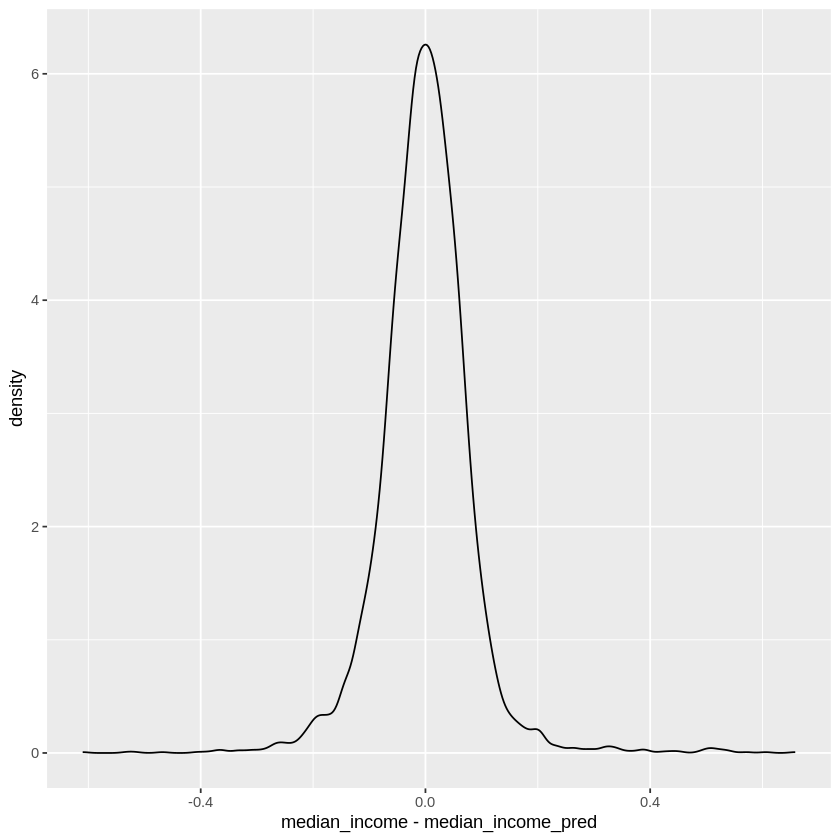

In [19]:
library(tidyverse)
df <- read.csv("housing.csv")

names(df) <- names(df) %>%
  str_replace_all("-", "_") %>%
  str_replace_all("[^_A-Za-z0-9]*", "") %>%
  str_to_lower()

scale <- function(a) {
  (a - min(a)) / (max(a) - min(a))
}
df_num <- df %>%
  select(where(is.numeric)) %>%
  mutate(across(where(is.numeric), scale))

set.seed(123)
train <- runif(nrow(df_num)) < 0.75
test <- !train

f <- median_income ~ longitude + latitude	+ housing_median_age + total_rooms + population	+ households + median_house_value
m <- lm(f, data = df_num %>% filter(train))

dx <- df_num %>% filter(test)
dx <- dx %>%
  mutate(median_income_pred = predict(m, dx %>% as.data.frame()))

ggplot(dx, aes(median_income, median_income_pred)) +
  geom_point() +
  geom_segment(aes(x = 0, y = 0, xend = 1, yend = 1))


ggplot(dx, aes(median_income - median_income_pred)) +
  geom_density()
print(m)

## Question 6
This question runs through a logistic regression example. We want to predict diabetes diagnosis based on the other variables.
#### a) First, load the `diabetes.csv` data set. Look at the data in some useful way. Why is logistic regression appropriate here?

In [20]:
library(tidyverse)
df <- read.csv("diabetes.csv")

head(df)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,0,0,25.6,0.201,30,0


Here having a logistic regression is good becuase the outcome is either 1 or 0, meaning they either have diabeties or not

#### b) Scale data and split it 75/25 training/testing. Set seed = 123.

In [4]:
library(tidyverse)
df <- read.csv("diabetes.csv")

names(df) <- names(df) %>%
  str_replace_all("-", "_") %>%
  str_replace_all("[^_A-Za-z0-9]*", "") %>%
  str_to_lower()

scale <- function(a) {
  (a - min(a)) / (max(a) - min(a))
}
sample_size <- floor(0.75 * nrow(df))
train_indices <- sample(seq_len(nrow(df)), size = sample_size)

train_data <- df[train_indices, ]
test_data <- df[-train_indices, ]

set.seed(123)
train <- runif(nrow(df_num)) < 0.75
test <- !train

train_predictors <- train_data[, -ncol(train_data)]
train_outcome <- train_data[, ncol(train_data)]

#### c) Fit the model.

In [7]:

library(tidyverse)
df <- read.csv("diabetes.csv")

names(df) <- names(df) %>%
  str_replace_all("-", "_") %>%
  str_replace_all("[^_A-Za-z0-9]*", "") %>%
  str_to_lower()

scale <- function(a) {
  (a - min(a)) / (max(a) - min(a))
}

set.seed(123)

sample_size <- floor(0.75 * nrow(df))
train_indices <- sample(seq_len(nrow(df)), size = sample_size)

train_data <- df[train_indices, ]
test_data <- df[-train_indices, ]

train_predictors <- train_data[, -ncol(train_data)]
train_outcome <- train_data[, ncol(train_data)]

test_predictors <- test_data[, -ncol(test_data)]
test_outcome <- test_data[, ncol(test_data)]
train_predictors_scaled <- as.data.frame(lapply(train_predictors, scale))
test_predictors_scaled <- as.data.frame(lapply(test_predictors, scale))
train_final <- cbind(train_predictors_scaled, outcome = train_outcome)
test_final <- cbind(test_predictors_scaled, outcome = test_outcome)

model <- glm(outcome ~ ., data = train_final, family = binomial)
summary(model)


Call:
glm(formula = outcome ~ ., family = binomial, data = train_final)

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)               -8.0501     0.7875 -10.223  < 2e-16 ***
pregnancies                1.9808     0.6376   3.107  0.00189 ** 
glucose                    7.3239     0.8832   8.293  < 2e-16 ***
bloodpressure             -1.5021     0.6524  -2.302  0.02131 *  
skinthickness              0.4781     0.7778   0.615  0.53875    
insulin                   -1.1441     0.8556  -1.337  0.18117    
bmi                        5.7136     1.1584   4.932 8.12e-07 ***
diabetespedigreefunction   1.6852     0.7724   2.182  0.02912 *  
age                        0.9522     0.6526   1.459  0.14456    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 745.11  on 575  degrees of freedom
Residual deviance: 538.57  on 567  degrees of freedom
AIC: 556.57

Numbe

#### d) Make predictions on test data. Print a table with the number of true positives, false positives, true negatives, false negatives, and accuracy.

In [8]:
library(tidyverse)
df <- read.csv("diabetes.csv")

names(df) <- names(df) %>%
  str_replace_all("-", "_") %>%
  str_replace_all("[^_A-Za-z0-9]*", "") %>%
  str_to_lower()

scale <- function(a) {
  (a - min(a)) / (max(a) - min(a))
}

set.seed(123)

sample_size <- floor(0.75 * nrow(df))
train_indices <- sample(seq_len(nrow(df)), size = sample_size)

train_data <- df[train_indices, ]
test_data <- df[-train_indices, ]

train_predictors <- train_data[, -ncol(train_data)]
train_outcome <- train_data[, ncol(train_data)]

test_predictors <- test_data[, -ncol(test_data)]
test_outcome <- test_data[, ncol(test_data)]
train_predictors_scaled <- as.data.frame(lapply(train_predictors, scale))
test_predictors_scaled <- as.data.frame(lapply(test_predictors, scale))
train_final <- cbind(train_predictors_scaled, outcome = train_outcome)
test_final <- cbind(test_predictors_scaled, outcome = test_outcome)

model <- glm(outcome ~ ., data = train_final, family = binomial)


pred_probs <- predict(model, newdata = test_final, type = "response")
pred_class <- ifelse(pred_probs > 0.5, 1, 0)

assumption <- table(Predicted = pred_class, Actual = test_final$outcome)
print(assumption)

TN <- assumption[1, 1]
FP <- assumption[2, 1]
FN <- assumption[1, 2]
TP <- assumption[2, 2]

accuracy <- (TP + TN) / (TP + TN + FP + FN)

results <- data.frame(
  Metric = c("TP", "FP", "TN", "FN", "Accuracy"),
  Value = c(TP, FP, TN, FN, round(accuracy, 4))
)

print(results)

         Actual
Predicted  0  1
        0 84 13
        1 41 54
    Metric   Value
1       TP 54.0000
2       FP 41.0000
3       TN 84.0000
4       FN 13.0000
5 Accuracy  0.7188


#### e) Fit a LASSO-regularized logistic regression model. Again, set seed = 123. Which variables are the most important (which ones don't go to zero)? How does the LASSO model affect the accuracy?

In [13]:
install.packages("glmnet")
library(glmnet)
library(tidyverse)
df <- read.csv("diabetes.csv")

names(df) <- names(df) %>%
  str_replace_all("-", "_") %>%
  str_replace_all("[^_A-Za-z0-9]*", "") %>%
  str_to_lower()

scale <- function(a) {
  (a - min(a)) / (max(a) - min(a))
}

set.seed(123)

sample_size <- floor(0.75 * nrow(df))
train_indices <- sample(seq_len(nrow(df)), size = sample_size)

train_data <- df[train_indices, ]
test_data <- df[-train_indices, ]

train_predictors <- train_data[, -ncol(train_data)]
train_outcome <- train_data[, ncol(train_data)]

test_predictors <- test_data[, -ncol(test_data)]
test_outcome <- test_data[, ncol(test_data)]
train_predictors_scaled <- as.data.frame(lapply(train_predictors, scale))
test_predictors_scaled <- as.data.frame(lapply(test_predictors, scale))
train_final <- cbind(train_predictors_scaled, outcome = train_outcome)
test_final <- cbind(test_predictors_scaled, outcome = test_outcome)

model <- glm(outcome ~ ., data = train_final, family = binomial)


pred_probs <- predict(model, newdata = test_final, type = "response")
pred_class <- ifelse(pred_probs > 0.5, 1, 0)

assumption <- table(Predicted = pred_class, Actual = test_final$outcome)
print(assumption)

TN <- assumption[1, 1]
FP <- assumption[2, 1]
FN <- assumption[1, 2]
TP <- assumption[2, 2]

accuracy <- (TP + TN) / (TP + TN + FP + FN)

results <- data.frame(
  Metric = c("TP", "FP", "TN", "FN", "Accuracy"),
  Value = c(TP, FP, TN, FN, round(accuracy, 4))
)

set.seed(123)
x_train <- as.matrix(train_predictors_scaled)
y_train <- train_outcome
x_test <- as.matrix(test_predictors_scaled)
y_test <- test_outcome

lasso_cv <- cv.glmnet(x_train, y_train, family = "binomial", alpha = 1)

cat("Important variables:\n")
print(coef(lasso_cv, s = "lambda.min"))

lasso_pred <- predict(lasso_cv, newx = x_test, s = "lambda.min", type = "class")
lasso_accuracy <- mean(lasso_pred == y_test)

cat("\nConfusion Matrix:\n")
print(table(Predicted = lasso_pred, Actual = y_test))
cat("\nStandard Accuracy:", round(accuracy, 4))
cat("\nLASSO Accuracy:", round(lasso_accuracy, 4), "\n")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘foreach’, ‘shape’, ‘RcppEigen’


Warning message in install.packages("glmnet"):
“installation of package ‘glmnet’ had non-zero exit status”


ERROR: Error in library(glmnet): there is no package called ‘glmnet’


#### f) Make a plot of actual vs. predicted values for the LASSO model.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loaded glmnet 4.1-10



         Actual
Predicted  0  1
        0 84 13
        1 41 54


`geom_smooth()` using formula = 'y ~ x'


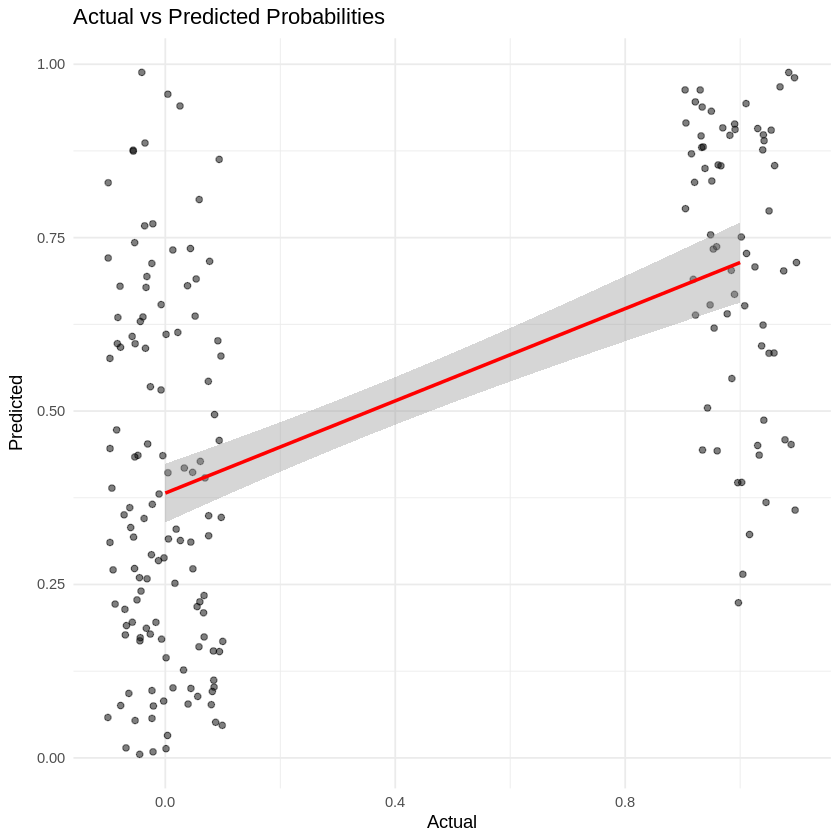

In [15]:
install.packages("glmnet")
library(glmnet)
library(tidyverse)
df <- read.csv("diabetes.csv")

names(df) <- names(df) %>%
  str_replace_all("-", "_") %>%
  str_replace_all("[^_A-Za-z0-9]*", "") %>%
  str_to_lower()

scale <- function(a) {
  (a - min(a)) / (max(a) - min(a))
}

set.seed(123)

sample_size <- floor(0.75 * nrow(df))
train_indices <- sample(seq_len(nrow(df)), size = sample_size)

train_data <- df[train_indices, ]
test_data <- df[-train_indices, ]

train_predictors <- train_data[, -ncol(train_data)]
train_outcome <- train_data[, ncol(train_data)]

test_predictors <- test_data[, -ncol(test_data)]
test_outcome <- test_data[, ncol(test_data)]
train_predictors_scaled <- as.data.frame(lapply(train_predictors, scale))
test_predictors_scaled <- as.data.frame(lapply(test_predictors, scale))
train_final <- cbind(train_predictors_scaled, outcome = train_outcome)
test_final <- cbind(test_predictors_scaled, outcome = test_outcome)

model <- glm(outcome ~ ., data = train_final, family = binomial)


pred_probs <- predict(model, newdata = test_final, type = "response")
pred_class <- ifelse(pred_probs > 0.5, 1, 0)

assumption <- table(Predicted = pred_class, Actual = test_final$outcome)
print(assumption)

TN <- assumption[1, 1]
FP <- assumption[2, 1]
FN <- assumption[1, 2]
TP <- assumption[2, 2]

accuracy <- (TP + TN) / (TP + TN + FP + FN)

results <- data.frame(
  Metric = c("TP", "FP", "TN", "FN", "Accuracy"),
  Value = c(TP, FP, TN, FN, round(accuracy, 4))
)

set.seed(123)
x_train <- as.matrix(train_predictors_scaled)
y_train <- train_outcome
x_test <- as.matrix(test_predictors_scaled)
y_test <- test_outcome

lasso_cv <- cv.glmnet(x_train, y_train, family = "binomial", alpha = 1)

lasso_pred_probs <- predict(lasso_cv, newx = x_test, s = "lambda.min", type = "response")
plot_data <- data.frame(
  Actual = y_test,
  Predicted = as.vector(lasso_pred_probs)
)
ggplot(plot_data, aes(x = Actual, y = Predicted)) +
  geom_jitter(width = 0.1, alpha = 0.5) +
  geom_smooth(method = "lm", se = TRUE, color = "red") +
  labs(
    title = "Actual vs Predicted Probabilities",
    x = "Actual",
    y = "Predicted"
  ) +
  theme_minimal()